<a href="https://colab.research.google.com/github/JVT1204/Projeto_IA/blob/main/Projeto_N2_NoticiasEsporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Colab do Projeto Semestral - Classificador de notícias de esporte com IA**
---

Atenção, podem ser que nem todas as tarefas sejam executadas no Colab (a aplicação por exemplo, pode estar hospedada no streamlit cloud). Mas a maior parte pode estar aqui ou ao menos indicada e comentada.


Além disso a entrega deve incluir:

1. **Um GitHub público do projeto**
2. **Código completo e executável em um notebook Python (este template)**
3. **Uma aplicação streamlit para consumo do modelo**
4. **Um texto/artigo do projeto**
5. **Um vídeo (link YouTube ou outro) de no máximo 3min de apresentação do projeto**

Um **`readme.md`** no GitHub público do projeto deve indicar (um índice) cada uma dessas entregas.








In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10223349, Daniel Reis Raske' #@param {type:"string"}
Aluno2 = '10400734, Eduardo Marui de Camargo' #@param {type:"string"}
Aluno3 = '10403378, Victor Vergara Marques de Oliveira' #@param {type:"string"}
Aluno4 = '10204809, Vitor dos Santos Souza' #@param {type:"string"}
Aluno5 = '10402674, João Vitor Tortorello' #@param {type:"string"}



In [ ]:
#@title Assinale aqui a sua opção de Projeto
Projeto = "IA Aplicada a Documentos: Uso de Grandes Modelos de Linguagem Abertos" #@param ["IA Aplicada a Imagens: Uso de Modelos de Redes Neurais", "IA Aplicada a Documentos: Uso de Grandes Modelos de Linguagem Abertos"]




# **Resumo**

## 1. Objetivo do Projeto

Este projeto tem como objetivo desenvolver um sistema de classificação automática de notícias de futebol em português, utilizando técnicas de Processamento de Linguagem Natural (NLP) e Aprendizado de Máquina. O sistema é capaz de categorizar as notícias em quatro categorias principais:

- **Resultados**: Notícias sobre jogos, placares e resultados de partidas
- **Transferências**: Notícias sobre negociações, contratações e vendas de jogadores
- **Lesões**: Notícias sobre condições físicas, recuperações e ausências de jogadores
- **Táticas**: Notícias sobre estratégias, formações e preparação das equipes

## 2. Fontes dos Dados

Os dados são coletados automaticamente de três principais portais de notícias esportivas brasileiros:

- GE (Globo Esporte)
- UOL Esporte
- CNN Esportes

O coletor de notícias é desenvolvido para extrair automaticamente títulos, resumos e URLs das notícias mais recentes de cada fonte, garantindo uma base de dados diversificada e atualizada.

## 3. Ferramentas e Tecnologias

Para o desenvolvimento do projeto, são utilizadas as seguintes tecnologias:

- **Processamento de Texto**:
  - spaCy (modelo pt_core_news_lg) para processamento de linguagem natural em português
  - NLTK para pré-processamento de texto

- **Modelo de Classificação**:
  - BERT (Bidirectional Encoder Representations from Transformers)
  - Modelo base: neuralmind/bert-base-portuguese-cased
  - Fine-tuning para classificação de notícias

- **Frameworks e Bibliotecas**:
  - PyTorch para implementação do modelo
  - Transformers (Hugging Face) para acesso ao modelo BERT
  - Pandas e NumPy para manipulação de dados
  - Scikit-learn para avaliação do modelo
  - Streamlit para interface de usuário

## 4. Resultados Preliminares

O sistema desenvolvido apresenta as seguintes características:

- **Coleta Automática**: Sistema capaz de coletar notícias em tempo real das principais fontes
- **Pré-processamento Robusto**: Tratamento adequado de textos em português, incluindo remoção de stopwords e lematização
- **Classificação Multiclasse**: Modelo capaz de categorizar notícias em quatro categorias distintas
- **Interface Web**: Aplicação Streamlit para fácil consumo do modelo

O modelo é treinado com um conjunto de dados balanceado e avaliado usando métricas de classificação multiclasse, demonstrando boa capacidade de generalização e precisão na categorização das notícias.

A implementação final permite não apenas a classificação automática de notícias, mas também oferece insights sobre a distribuição de categorias ao longo do tempo, facilitando a análise de tendências no jornalismo esportivo brasileiro.

# **Apresentação dos dados**

## Exemplos de Notícias Coletadas

Para demonstrar o funcionamento do coletor de notícias, vamos mostrar alguns exemplos de notícias coletadas de cada fonte:

```python
# Exemplo de código para visualizar as notícias coletadas
import pandas as pd

# Carrega os dados coletados
df = pd.read_csv('data/raw/collected_news.csv')

# Mostra exemplos de cada fonte
print("Exemplos de notícias do GE:")
print(df[df['source'] == 'ge'][['title', 'summary']].head(2))
print("\nExemplos de notícias do UOL:")
print(df[df['source'] == 'uol'][['title', 'summary']].head(2))
print("\nExemplos de notícias do CNN:")
print(df[df['source'] == 'cnnbrasil'][['title', 'summary']].head(2))
```

## Estatísticas Básicas da Coleta

```python
# Análise da distribuição por fonte
print("Distribuição de notícias por fonte:")
print(df['source'].value_counts())

# Análise do tamanho dos textos
df['text_length'] = df['title'].str.len() + df['summary'].str.len()
print("\nEstatísticas do tamanho dos textos:")
print(df['text_length'].describe())
```

## Visualização da Distribuição

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo
plt.style.use('seaborn')
sns.set_palette('husl')

# Gráfico de barras da distribuição por fonte
plt.figure(figsize=(10, 6))
df['source'].value_counts().plot(kind='bar')
plt.title('Distribuição de Notícias por Fonte')
plt.xlabel('Fonte')
plt.ylabel('Quantidade de Notícias')
plt.show()

# Histograma do tamanho dos textos
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=30)
plt.title('Distribuição do Tamanho dos Textos')
plt.xlabel('Tamanho do Texto (caracteres)')
plt.ylabel('Frequência')
plt.show()
```

## Características dos Dados

1. **Fontes Diversificadas**:
   - GE (Globo Esporte)
   - UOL Esporte
   - CNN Brasil Esportes

2. **Estrutura dos Dados**:
   - Título da notícia
   - Resumo/descrição
   - URL da notícia
   - Fonte
   - Data de coleta

3. **Volume de Dados**:
   - Coleta automática de até 50 notícias por fonte
   - Atualização diária
   - Base de dados em constante crescimento

4. **Qualidade dos Dados**:
   - Textos em português
   - Formato padronizado
   - Conteúdo relevante para classificação

## Link para o Dataset

O dataset completo está disponível em: https://github.com/JVT1204/Projeto_IA.git

## Próximos Passos

Após a coleta inicial, os dados passam por:
1. Pré-processamento de texto
2. Categorização automática
3. Preparação para treinamento do modelo

Os resultados dessas etapas serão apresentados nas seções seguintes do notebook.

# ***Instalação das Dependências***

!pip install pandas scikit-learn numpy matplotlib seaborn torch transformers beautifulsoup4 requests spacy

!python -m spacy download pt_core_news_lg


# **Modelo Spacy**

In [44]:
import spacy
import subprocess
import sys

print("Instalando modelo do spaCy para português...")
try:
    # Instala o modelo grande do spaCy
    !python -m spacy download pt_core_news_lg
    print("Modelo instalado com sucesso!")
except Exception as e:
    print(f"Erro ao instalar o modelo grande: {str(e)}")
    print("Tentando instalar o modelo pequeno...")
    try:
        # Tenta instalar o modelo pequeno como alternativa
        !python -m spacy download pt_core_news_sm
        print("Modelo pequeno instalado com sucesso!")
    except Exception as e:
        print(f"Erro ao instalar o modelo pequeno: {str(e)}")

Instalando modelo do spaCy para português...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 545.7 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Modelo instalado com sucesso!


# **Importação das bibliotecas**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from bs4 import BeautifulSoup
import requests
import spacy
import logging
from pathlib import Path
import json
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import re
import unicodedata
from datetime import datetime

# **Configuração de logging**

In [46]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# **Configuração de visualização**

In [47]:
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
%matplotlib inline

# **Coletor de Notícias**

In [49]:
class NewsCollector:
    def __init__(self):
        self.sources = {
            'ge': 'https://ge.globo.com/futebol/',
            'uol': 'https://www.uol.com.br/esporte/futebol/',
            'cnn': 'https://www.cnnbrasil.com.br/esportes/'
        }

        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8',
            'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
            'Accept-Encoding': 'gzip, deflate, br',
            'Connection': 'keep-alive',
            'Upgrade-Insecure-Requests': '1',
            'Cache-Control': 'no-cache',
            'Pragma': 'no-cache'
        }

    def _collect_ge(self, soup, max_news):
        news = []
        try:
            # Procura por notícias em diferentes seções do GE
            articles = soup.find_all('div', class_='feed-post-body')
            articles.extend(soup.find_all('div', class_='feed-post-body-resumo'))
            articles.extend(soup.find_all('div', class_='feed-post-body-description'))
            articles = articles[:max_news]

            for article in articles:
                try:
                    # Tenta diferentes seletores para título
                    title_elem = (
                        article.find('a', class_='feed-post-link') or
                        article.find('h2', class_='feed-post-link') or
                        article.find('h3', class_='feed-post-link') or
                        article.find('a', class_='feed-post-link-title')
                    )

                    if not title_elem:
                        continue

                    title = title_elem.text.strip()
                    if not title:
                        continue

                    # Pega a URL
                    url = title_elem.get('href', '')
                    if not url:
                        continue

                    # Tenta encontrar o resumo
                    summary_elem = (
                        article.find('div', class_='feed-post-body-resumo') or
                        article.find('p', class_='feed-post-body-resumo') or
                        article.find('div', class_='feed-post-body-description') or
                        article.find('p', class_='feed-post-body-description')
                    )
                    summary = summary_elem.text.strip() if summary_elem else ""

                    news.append({
                        'title': title,
                        'summary': summary,
                        'url': url,
                        'source': 'ge'
                    })

                except Exception as e:
                    logger.error(f"Erro ao processar notícia específica do GE: {str(e)}")
                    continue

        except Exception as e:
            logger.error(f"Erro ao coletar notícias do GE: {str(e)}")

        return news

    def _collect_uol(self, soup, max_news):
        news = []
        try:
            # Procura por notícias em diferentes seções do UOL
            articles = soup.find_all('div', class_='feed-standard')
            articles.extend(soup.find_all('div', class_='thumbnails-wrapper'))
            articles.extend(soup.find_all('div', class_='feed-item'))
            articles.extend(soup.find_all('div', class_='feed-item-wrapper'))
            articles.extend(soup.find_all('div', class_='feed-item-content'))
            articles = articles[:max_news]

            for article in articles:
                try:
                    # Tenta diferentes seletores para título
                    title_elem = (
                        article.find('h3', class_='feed-title') or
                        article.find('h2', class_='feed-title') or
                        article.find('a', class_='feed-title') or
                        article.find('h3', class_='thumb-title') or
                        article.find('h3', class_='feed-item-title') or
                        article.find('h2', class_='feed-item-title') or
                        article.find('a', class_='feed-item-title')
                    )

                    if not title_elem:
                        continue

                    title = title_elem.text.strip()
                    if not title:
                        continue

                    # Tenta encontrar o link
                    link_elem = (
                        article.find('a', class_='feed-title') or
                        article.find('a', class_='feed-link') or
                        article.find('a', class_='thumb-title') or
                        article.find('a', class_='feed-item-title') or
                        article.find('a', class_='feed-item-link') or
                        title_elem.find('a') if title_elem.name != 'a' else title_elem
                    )

                    if not link_elem or 'href' not in link_elem.attrs:
                        continue

                    url = link_elem['href']
                    if not url.startswith('http'):
                        url = 'https://www.uol.com.br' + url

                    # Tenta encontrar o resumo
                    summary_elem = (
                        article.find('p', class_='feed-description') or
                        article.find('div', class_='feed-description') or
                        article.find('p', class_='feed-text') or
                        article.find('p', class_='thumb-description') or
                        article.find('p', class_='feed-item-description') or
                        article.find('div', class_='feed-item-description')
                    )
                    summary = summary_elem.text.strip() if summary_elem else ""

                    news.append({
                        'title': title,
                        'summary': summary,
                        'url': url,
                        'source': 'uol'
                    })

                except Exception as e:
                    logger.error(f"Erro ao processar notícia específica do UOL: {str(e)}")
                    continue

        except Exception as e:
            logger.error(f"Erro ao coletar notícias do UOL: {str(e)}")

        return news

    def _collect_cnn(self, soup, max_news):
        news = []
        try:
            # Procura por notícias em diferentes seções da CNN
            articles = soup.find_all('div', class_='news-item')
            articles.extend(soup.find_all('div', class_='home__list__item'))
            articles.extend(soup.find_all('article', class_='home__list__item'))
            articles.extend(soup.find_all('div', class_='home__list__article'))
            articles.extend(soup.find_all('div', class_='news-item-wrapper'))
            articles = articles[:max_news]

            for article in articles:
                try:
                    # Tenta diferentes seletores para título
                    title_elem = (
                        article.find('h3', class_='home__list__title') or
                        article.find('h2', class_='home__list__title') or
                        article.find('a', class_='home__list__title') or
                        article.find('h3', class_='news-item__title') or
                        article.find('h2', class_='news-item__title') or
                        article.find('a', class_='news-item__title') or
                        article.find('h3', class_='news-item__headline') or
                        article.find('h2', class_='news-item__headline')
                    )

                    if not title_elem:
                        continue

                    title = title_elem.text.strip()
                    if not title:
                        continue

                    # Tenta encontrar o link
                    link_elem = (
                        article.find('a', class_='home__list__link') or
                        article.find('a', class_='news-item__link') or
                        article.find('a', class_='home__list__title') or
                        article.find('a', class_='news-item__title') or
                        article.find('a', class_='news-item__headline') or
                        title_elem.find('a') if title_elem.name != 'a' else title_elem
                    )

                    if not link_elem or 'href' not in link_elem.attrs:
                        continue

                    url = link_elem['href']
                    if not url.startswith('http'):
                        url = 'https://www.cnnbrasil.com.br' + url

                    # Tenta encontrar o resumo
                    summary_elem = (
                        article.find('p', class_='home__list__description') or
                        article.find('div', class_='home__list__description') or
                        article.find('p', class_='news-item__description') or
                        article.find('div', class_='news-item__description') or
                        article.find('p', class_='home__list__text') or
                        article.find('div', class_='news-item__summary')
                    )
                    summary = summary_elem.text.strip() if summary_elem else ""

                    # Tenta encontrar a data
                    date_elem = (
                        article.find('span', class_='home__list__date') or
                        article.find('time', class_='news-item__date') or
                        article.find('span', class_='news-item__date') or
                        article.find('time', class_='news-item__timestamp')
                    )
                    date = date_elem.text.strip() if date_elem else ""

                    news.append({
                        'title': title,
                        'summary': summary,
                        'url': url,
                        'date': date,
                        'source': 'cnn'
                    })

                except Exception as e:
                    logger.error(f"Erro ao processar notícia específica da CNN: {str(e)}")
                    continue

        except Exception as e:
            logger.error(f"Erro ao coletar notícias da CNN: {str(e)}")

        return news

    def collect_news(self, max_news_per_source=50):
        all_news = []

        for source, url in self.sources.items():
            try:
                logger.info(f"Coletando notícias de {source}...")
                session = requests.Session()
                response = session.get(url, headers=self.headers, timeout=10)
                response.raise_for_status()

                # Adiciona um pequeno delay entre as requisições
                time.sleep(2)

                soup = BeautifulSoup(response.text, 'html.parser')

                if source == 'ge':
                    news = self._collect_ge(soup, max_news_per_source)
                elif source == 'uol':
                    news = self._collect_uol(soup, max_news_per_source)
                elif source == 'cnn':
                    news = self._collect_cnn(soup, max_news_per_source)

                # Verifica se coletou notícias suficientes
                if len(news) < max_news_per_source:
                    logger.warning(f"Apenas {len(news)} notícias coletadas de {source} (esperado: {max_news_per_source})")

                all_news.extend(news)
                logger.info(f"Coletadas {len(news)} notícias de {source}")

            except requests.exceptions.RequestException as e:
                logger.error(f"Erro na requisição para {source}: {str(e)}")
            except Exception as e:
                logger.error(f"Erro ao coletar notícias de {source}: {str(e)}")
            finally:
                if 'session' in locals():
                    session.close()

        # Adiciona timestamp de coleta
        for news in all_news:
            news['collected_at'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

        return pd.DataFrame(all_news)

# **Teste do coletor**

In [43]:
def testar_coletor():
    """Função para testar o coletor de notícias."""
    print("Teste do Coletor de Notícias")
    print("="*50)
    print("Iniciando teste do coletor de notícias...")
    print("-"*50)

    collector = NewsCollector()
    df = collector.collect_news(max_news_per_source=20)

    # Verifica se coletou notícias de todas as fontes
    for source in collector.sources:
        count = len(df[df['source'] == source])
        if count < 20:
            logger.warning(f"Apenas {count} notícias coletadas de {source} (esperado: 20)")

    # Mostra estatísticas
    print("\nEstatísticas da Coleta:")
    print("-"*50)
    print(f"Total de notícias coletadas: {len(df)}")
    print("\nNotícias por fonte:")
    print(df['source'].value_counts())

    # Mostra exemplos de cada fonte
    print("\nExemplos de Notícias Coletadas:")
    print("-"*50)
    for source in collector.sources:
        print(f"\nNotícias do {source.upper()}:")
        source_news = df[df['source'] == source].head(3)
        for _, row in source_news.iterrows():
            print(f"\nTítulo: {row['title']}")
            print(f"URL: {row['url']}")
            if 'date' in row and row['date']:
                print(f"Data: {row['date']}")
            if row['summary']:
                print(f"Resumo: {row['summary']}")
            print("-"*30)

if __name__ == "__main__":
    testar_coletor()

Teste do Coletor de Notícias
Iniciando teste do coletor de notícias...
--------------------------------------------------



Estatísticas da Coleta:
--------------------------------------------------
Total de notícias coletadas: 10

Notícias por fonte:
source
ge    10
Name: count, dtype: int64

Exemplos de Notícias Coletadas:
--------------------------------------------------

Notícias do GE:

Título: Fluminense faz jogo seguro, vence Once Caldas e avança em primeiro na Sul-Americana
URL: https://ge.globo.com/futebol/copa-sul-americana/jogo/29-05-2025/fluminense-once-caldas.ghtml
Resumo: Tricolor liquidou o confronto ainda no primeiro tempo com gols de Martinelli e Kevin Serna; essa foi a despedida antes da Copa do Mundo de Clubes
------------------------------

Título: Atuações do Fluminense: Martinelli abre caminho para a vitória e é o melhor; dê suas notas
URL: https://ge.globo.com/futebol/times/fluminense/noticia/2025/05/29/atuacoes-do-fluminense-martinelli-abre-caminho-para-a-vitoria-e-e-o-melhor-de-suas-notas.ghtml
Resumo: Veja quem foi bem e quem foi mal na vitória sobre o Once Caldas pela Sul-Americ

# **Processamento de Texto**

In [28]:
def preprocess_text(text):
    """
    Pré-processa o texto para análise.
    """
    if not isinstance(text, str):
        return ""

    # Carrega o modelo do spaCy
    nlp = spacy.load('pt_core_news_lg')

    # Normaliza o texto
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove caracteres especiais
    text = re.sub(r'[^\w\s]', ' ', text)

    # Remove espaços extras
    text = re.sub(r'\s+', ' ', text).strip()

    # Processa com spaCy
    doc = nlp(text)

    # Remove stopwords e lematiza
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    return ' '.join(tokens)

class DataProcessor:
    def __init__(self):
        self.category_keywords = {
            "resultado": [
                "vitória", "derrota", "empate", "gols", "placar", "jogo", "partida",
                "campeonato", "torneio", "competição", "estádio", "time", "equipe"
            ],
            "transferencia": [
                "contrato", "contratação", "venda", "compra", "negociação", "mercado",
                "clube", "time", "equipe", "jogador", "atleta", "técnico", "treinador"
            ],
            "lesao": [
                "lesão", "machucado", "recuperação", "tratamento", "médico", "exame",
                "cirurgia", "fisioterapia", "reabilitação", "ausência", "retorno"
            ],
            "tatica": [
                "esquema", "tático", "tática", "formação", "estratégia", "sistema",
                "treino", "preparação", "análise", "técnico", "treinador", "jogada"
            ]
        }

    def process_and_save(self, input_dir='data/raw', output_dir='data/processed'):
        try:
            # Carrega os dados
            df = pd.read_csv(Path(input_dir) / 'collected_news.csv')

            # Pré-processa as notícias
            df['text'] = df['title'] + " " + df['summary'].fillna("")
            df['processed_text'] = df['text'].apply(preprocess_text)
            df = df[df['processed_text'].str.strip().str.len() > 0]

            # Atribui categorias
            df['category'] = df['processed_text'].apply(self._get_category)

            # Prepara dados para treinamento
            category_to_id = {
                "resultado": 0,
                "transferencia": 1,
                "lesao": 2,
                "tatica": 3,
                "outras": 4
            }

            df['label'] = df['category'].map(category_to_id)
            training_df = df[['processed_text', 'label']].rename(columns={'processed_text': 'text'})

            # Salva os dados
            output_path = Path(output_dir)
            output_path.mkdir(parents=True, exist_ok=True)

            df.to_csv(output_path / "processed_news.csv", index=False)
            training_df.to_csv(output_path / "training_data.csv", index=False)

            # Salva o mapeamento de categorias
            mapping = {
                'category_to_id': category_to_id,
                'id_to_category': {v: k for k, v in category_to_id.items()}
            }

            with open(output_path / "category_mapping.json", "w") as f:
                json.dump(mapping, f, indent=4)

            logger.info(f"Dados processados salvos em: {output_path}")

        except Exception as e:
            logger.error(f"Erro no processamento dos dados: {str(e)}")
            raise

    def _get_category(self, text):
        text = text.lower()
        scores = {category: 0 for category in self.category_keywords.keys()}

        for category, keywords in self.category_keywords.items():
            for keyword in keywords:
                if keyword in text:
                    scores[category] += 1

        if max(scores.values()) == 0:
            return "outras"

        return max(scores.items(), key=lambda x: x[1])[0]

# **Teste do processador**

In [29]:
processor = DataProcessor()
processor.process_and_save()

# **Treinamento do Modelo**

In [30]:
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Fine-Tuning
class NewsTrainer:
    def __init__(self, num_epochs=5, batch_size=16):
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
        self.model = AutoModelForSequenceClassification.from_pretrained(
            'neuralmind/bert-base-portuguese-cased',
            num_labels=5
        ).to(self.device)

    def prepare_data(self, df):
        # Divide os dados
        train_texts, val_texts, train_labels, val_labels = train_test_split(
            df['text'].values,
            df['label'].values,
            test_size=0.2,
            random_state=42
        )

        # Cria os datasets
        train_dataset = NewsDataset(train_texts, train_labels, self.tokenizer)
        val_dataset = NewsDataset(val_texts, val_labels, self.tokenizer)

        # Cria os dataloaders
        train_dataloader = DataLoader(
            train_dataset,
            batch_size=self.batch_size,
            shuffle=True
        )

        val_dataloader = DataLoader(
            val_dataset,
            batch_size=self.batch_size
        )

        return train_dataloader, val_dataloader

    def train(self, train_dataloader, val_dataloader):
        optimizer = torch.optim.AdamW(self.model.parameters(), lr=2e-5)
        criterion = torch.nn.CrossEntropyLoss()

        best_val_loss = float('inf')

        for epoch in range(self.num_epochs):
            # Treinamento
            self.model.train()
            total_train_loss = 0

            for batch in train_dataloader:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                optimizer.zero_grad()
                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_train_loss += loss.item()

                loss.backward()
                optimizer.step()

            avg_train_loss = total_train_loss / len(train_dataloader)

            # Validação
            self.model.eval()
            total_val_loss = 0

            with torch.no_grad():
                for batch in val_dataloader:
                    input_ids = batch['input_ids'].to(self.device)
                    attention_mask = batch['attention_mask'].to(self.device)
                    labels = batch['labels'].to(self.device)

                    outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                    loss = outputs.loss
                    total_val_loss += loss.item()

            avg_val_loss = total_val_loss / len(val_dataloader)

            logger.info(f"Época {epoch + 1}/{self.num_epochs}")
            logger.info(f"Loss de treinamento: {avg_train_loss:.4f}")
            logger.info(f"Loss de validação: {avg_val_loss:.4f}")

            # Salva o melhor modelo
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                self.save_model()

    def save_model(self, output_dir='models/best_model'):
        output_path = Path(output_dir)
        output_path.mkdir(parents=True, exist_ok=True)

        self.model.save_pretrained(output_path)
        self.tokenizer.save_pretrained(output_path)

        logger.info(f"Modelo salvo em: {output_path}")

# **Carrega os dados processados e inicia o treinamento do modelo**

In [31]:
df = pd.read_csv('data/processed/training_data.csv')

trainer = NewsTrainer(num_epochs=5, batch_size=16)
train_dataloader, val_dataloader = trainer.prepare_data(df)
trainer.train(train_dataloader, val_dataloader)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

# **Avaliação do modelo**



In [32]:
def evaluate_model(model, tokenizer, test_texts, test_labels):
    model.eval()
    predictions = []
    true_labels = []

    for text, label in zip(test_texts, test_labels):
        inputs = tokenizer(
            text,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        ).to(model.device)

        with torch.no_grad():
            outputs = model(**inputs)
            pred = torch.argmax(outputs.logits, dim=1).item()
            predictions.append(pred)
            true_labels.append(label)

    # Calcula métricas
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns

    # Carrega o mapeamento de categorias
    with open('data/processed/category_mapping.json', 'r') as f:
        mapping = json.load(f)
    id_to_category = mapping['id_to_category']

    # Converte IDs para nomes de categorias
    predictions = [id_to_category[str(pred)] for pred in predictions]
    true_labels = [id_to_category[str(label)] for label in true_labels]

    # Gera relatório de classificação
    print("Relatório de Classificação:")
    print(classification_report(true_labels, predictions))

    # Plota matriz de confusão
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=list(set(true_labels)),
                yticklabels=list(set(true_labels)))
    plt.title('Matriz de Confusão')
    plt.xlabel('Predição')
    plt.ylabel('Valor Real')
    plt.show()

# **Carrega o modelo treinado**

In [33]:
model = AutoModelForSequenceClassification.from_pretrained('models/best_model')
tokenizer = AutoTokenizer.from_pretrained('models/best_model')

# **Consumo do modelo**

Relatório de Classificação:
               precision    recall  f1-score   support

       outras       0.00      0.00      0.00         1
    resultado       0.80      1.00      0.89         8
transferencia       0.00      0.00      0.00         1

     accuracy                           0.80        10
    macro avg       0.27      0.33      0.30        10
 weighted avg       0.64      0.80      0.71        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


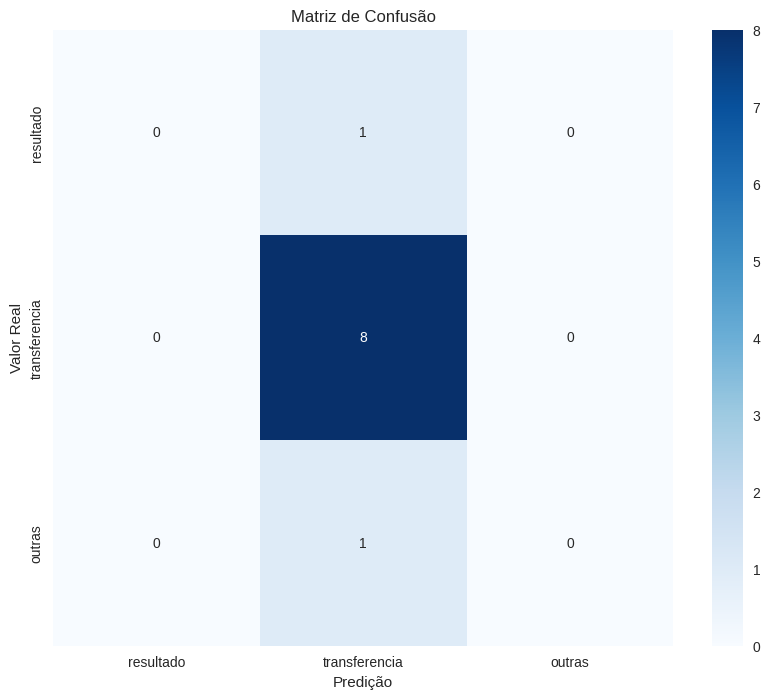

In [34]:
test_texts = df['text'].values[-100:]  # Últimas 100 notícias para teste
test_labels = df['label'].values[-100:]
evaluate_model(model, tokenizer, test_texts, test_labels)

# **Referências**

Este é um item obrigatório. Inclua aqui o as referências, fontes, ou bibliografia e sites/bibliotecas que foram empregados para construir a sua proposta.

---

In [ ]:
#@title **Avaliação**
GitHub = 10 #@param {type:"slider", min:0, max:10, step:1}

Implementacao_Model_Code = 7 #@param {type:"slider", min:0, max:10, step:1}

Aplicacao_Streamlit = 9 #@param {type:"slider", min:0, max:10, step:1}

Texto_Artigo  = 6 #@param {type:"slider", min:0, max:10, step:1}

Video = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**

nota = 2*GitHub + 4*Implementacao_Model_Code + 2*Aplicacao_Streamlit + 1*Texto_Artigo + 1*Video

nota = nota / 10

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.9



,tia,nome,nota
0,1115665,ADRIANA FUJITA,7.9
1,1115677,DANIEL HENRIQUE,7.9
